In [12]:
"""ВАЖНОЕ
OvA = OvR one versus all/rest позволяет расширять любой двоичный классификатор с целью решения многклассовых задач
обучаем по одному классификатору на класс, при этом специфический класс трактуется как
положительный, а образцы из всех остальных классов считаются
принадлежащими отрицательным классам.
Пакетный градиентный спуск - когда изменение весов происходит после прохода по всему набору данных
в Adaline как раз использовался такой
Альтернатива - стохастический градиентный спуск SGD зачастую сходится быстрее из-за более частого обновления весов
мини-пакетный градиентный спуск среднее"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
class Perceptron(object):
    """Классификатор на основе персептрона.
    Параметры
    eta : float
    Скорость обучения (между О . О и 1 . 0 )
    п iter : int
    Пр оходы по обучающему набору данных .
    random state : int
    Начальное значение генератора случайных чисел
    для инициализации случайными весами.
    Атрибуты
    w_ : одномерный массив
    Веса после подгонки .
    errors : список
    Количество неправильных классификаций (обно влений) в каждой эпохе ."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Подгоняет к обучающим данным .
        Параметры
        Х : {подобен массиву} , форма = [n_examples , n_features]
        Обучающие векторы , где n_examples - количество образцов
        и n_features - количеств о признаков .
        у : подобен массиву , форма = [n_examples]
        Целевые значения .
        Возвращает
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # ско = 0.01
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """вычисляем общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [14]:
df = pd.read_csv("iris.csv")
df.columns = [0, 1, 2, 3, 4]
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
y = df.iloc[0:100, 4].values
y = np.where(y == 0, -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [16]:
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

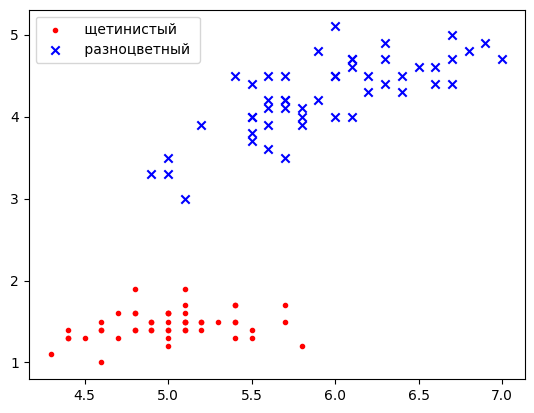

In [17]:
plt.scatter(X[:50, 0 ], X[: 50, 1 ], color= 'red', marker='.', label= ' щетинистый ' )
plt.scatter(X[50:100 , 0 ], X[50:100 , 1], color = 'blue' , marker='x', label= ' разноцветный ' )
plt.legend()

Text(0, 0.5, 'Количество обновлений')

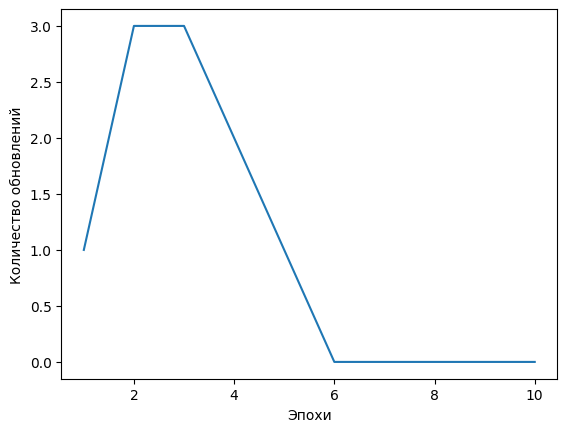

In [18]:
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')

In [19]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, у, classifier, resolution=0.02):
    # на строить генерат ор маркер ов и кар ту цветов
    markers = ( 's', 'x', 'o', '4', '4')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # вывести поверхность решения
    xl_min, xl_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(xl_min, xl_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).transpose())
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[у == cl, 1],
                    alpha=0.8,
                    c=colors [idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_2288\3365380715.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


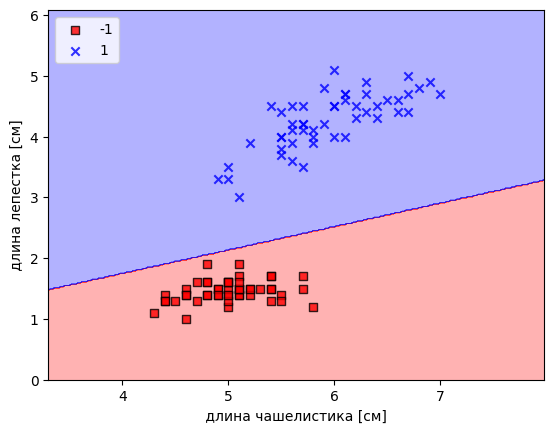

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel ( ' длина чашелистика [см] ' )
plt.ylabel ( ' длина лепестка [см] ' )
plt.legend ( loc='upper left')
plt.show ()

In [21]:
class AdalineGD(object):
    """Классификатор на основе персептрона.
    Параметры
    eta : float
    Скорость обучения (между О . О и 1 . 0 )
    п iter : int
    Пр оходы по обучающему набору данных .
    random state : int
    Начальное значение генератора случайных чисел
    для инициализации случайными весами.
    Атрибуты
    w_ : одномерный массив
    Веса после подгонки .
    cost_ : список
    значение функции издержек на основе суммы квадратов
    errors : список
    Количество неправильных классификаций (обно влений) в каждой эпохе ."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Подгоняет к обучающим данным .
        Параметры
        Х : {подобен массиву} , форма = [n_examples , n_features]
        Обучающие векторы , где n_examples - количество образцов
        и n_features - количеств о признаков .
        у : подобен массиву , форма = [n_examples]
        Целевые значения .
        Возвращает
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # ско = 0.01
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.transpose().dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """вычисляем общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def activation(self, X):
        """Функция вычисляет активацию, при необходимости заменить"""
        return(X)


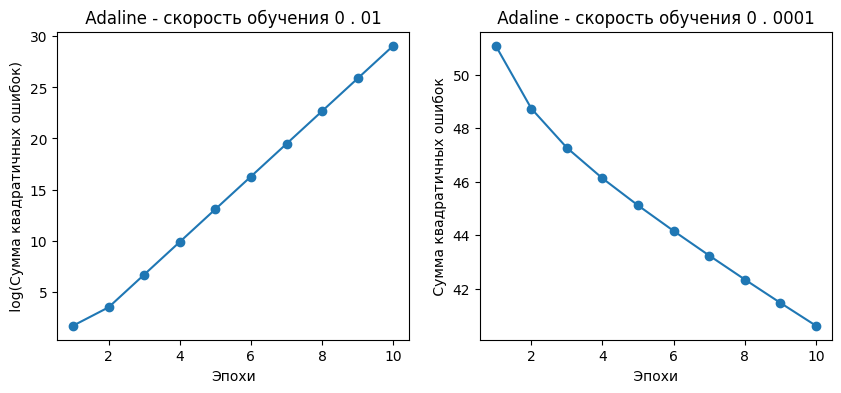

In [23]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01) .fit(X, y)
ax[0].plot( range (1 , len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel(' log(Cyммa квадратичных ошибок) ')
ax[0].set_title(' Adaline - скорость обучения 0 . 01 ')
ada2 = AdalineGD(n_iter=10, eta=0.0001) . fit(X, y)
ax[1].plot( range (1, len(ada2.cost_) + 1),
ada2.cost_, marker='o')
ax[1].set_xlabel( ' Эпохи ')
ax[1].set_ylabel(' Cyммa квадратичных ошибок ')
ax[1].set_title(' Adaline - скорость обучения 0 . 0001 ')
plt.show ()

In [ ]:
#x_std - нормализованные признаки
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_5268\3365380715.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


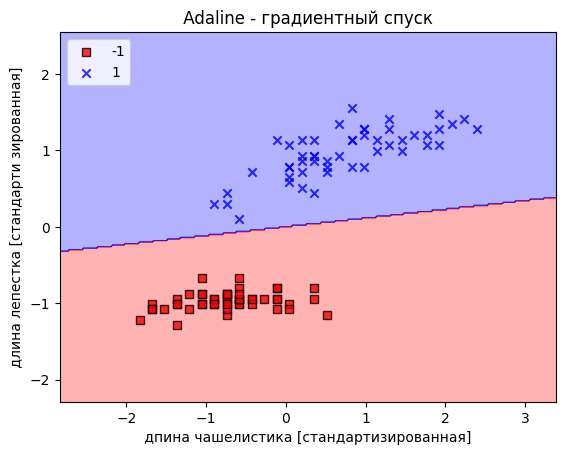

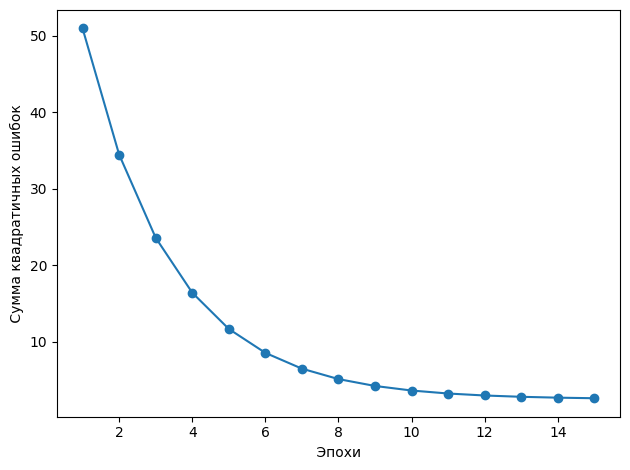

In [ ]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title ( ' Adaline - градиентный спуск ' )
plt.xlabel(' дпина чашелистика [стандартизированная] ')
plt.ylabel(' длина лепестка [стандарти зированная] ')
plt.legend(loc='upper left')
plt.tight_layout() #Функция tight_layout в Matplotlib эффективно изменяет размер подграфика, чтобы включить его в область графика.
plt.show()
plt .plot(range(1 , len(ada_gd.cost_) + 1) ,
                ada_gd.cost_ , marker='o')
plt.xlabel ( ' Эпохи ')
plt.ylabel ( ' Сумма квадратичных ошибок ')
plt.tight_layout()
plt.show ()

In [ ]:
#Реализация стохастического градиентного спуска, издержки в эпохе будем считать как средние, после обновления весов
#Метод partial_fit позволяет динамически обучать модель на новых данных
class AdalineSGD(object):
    """Классификатор на основе персептрона.
    Параметры
    eta : float
    Скорость обучения (между О . О и 1 . 0 )
    п iter : int
    Проходы по обучающему набору данных.
    shuffle : bool (True) - тассовать ли данные
    random state : int
    Начальное значение генератора случайных чисел
    для инициализации случайными весами.
    Атрибуты
    w_ : одномерный массив
    Веса после подгонки .
    cost_ : список
    значение функции издержек на основе суммы квадратов, усредненное
    по всем обучающим образцам в каждой эпохе
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=None, shuffle = True):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_initialized = False
        self.shuffle = shuffle

    def fit(self, X, y):
        """Подгоняет к обучающим данным .
        Параметры
        Х : {подобен массиву} , форма = [n_examples , n_features]
        Обучающие векторы , где n_examples - количество образцов
        и n_features - количество признаков .
        у : подобен массиву , форма = [n_examples]
        Целевые значения .
        Возвращает
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def _initialize_weights(self, m):
        '''Инициализирует веса небольшими случайными числами'''
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True

    def _shuffle(self, X, y):
        """Тасует обучающие данные"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _update_weights(self, xi, target):
        """Применяет правило обучения Adaline для обновления весов"""
        output = self.activation(self.net_input(xi))
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def partial_fit(self, X, y):
        """Подгоняет к обучающим наборам данных без повторной инициализации весов"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return(self)


    def net_input(self, X):
        """вычисляем общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def activation(self, X):
        """Функция вычисляет активацию, при необходимости заменить"""
        return(X)


C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_5268\3365380715.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


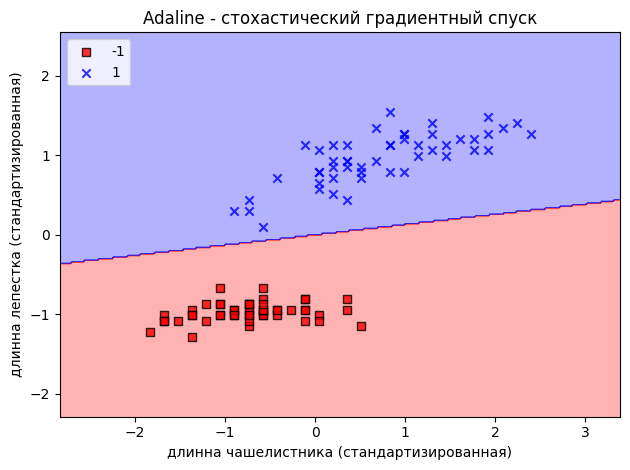

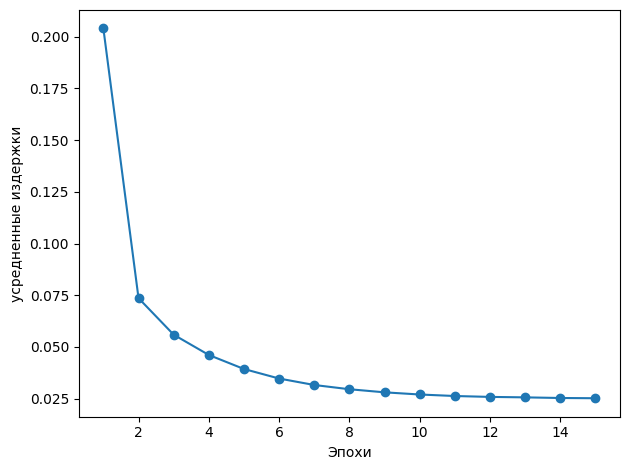

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title( 'Adaline - стохастический градиентный спуск')
plt.xlabel('длинна чашелистника (стандартизированная)' )
plt. ylabel ('длинна лепестка (стандартизированная)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_,
                marker='o')
plt.xlabel ( 'Эпохи' )
plt.ylabel ('усредненные издержки')
plt.tight_layout ()
plt.show()

In [ ]:
len(ada_sgd.cost_)

1500